<a href="https://colab.research.google.com/github/Ghzraza/Ethological-Behavioral-Analysis/blob/main/Mouse_Behavioral_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

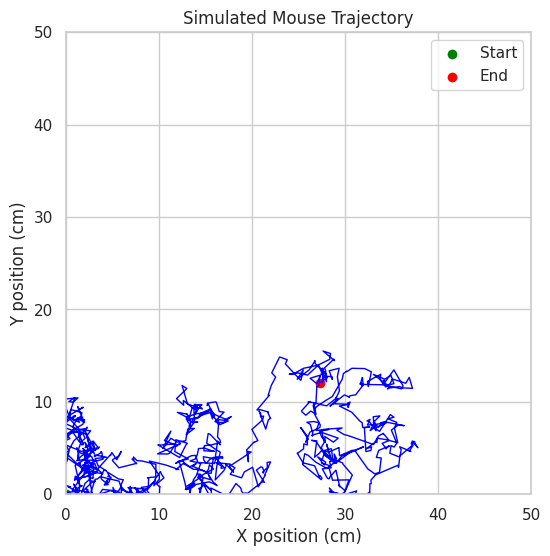

Total distance traveled: 747.99 cm
Time spent in center: 2 frames


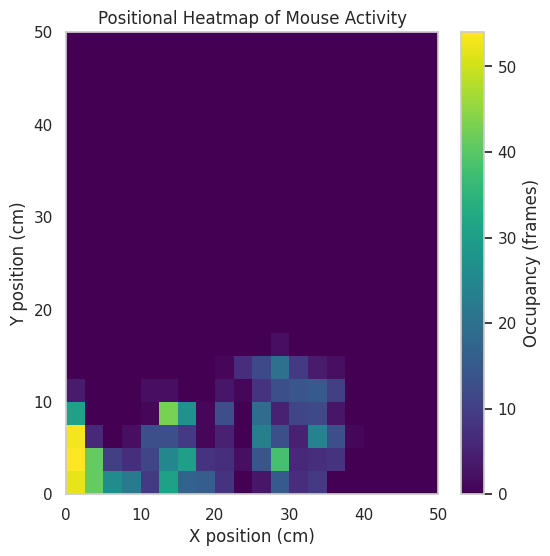

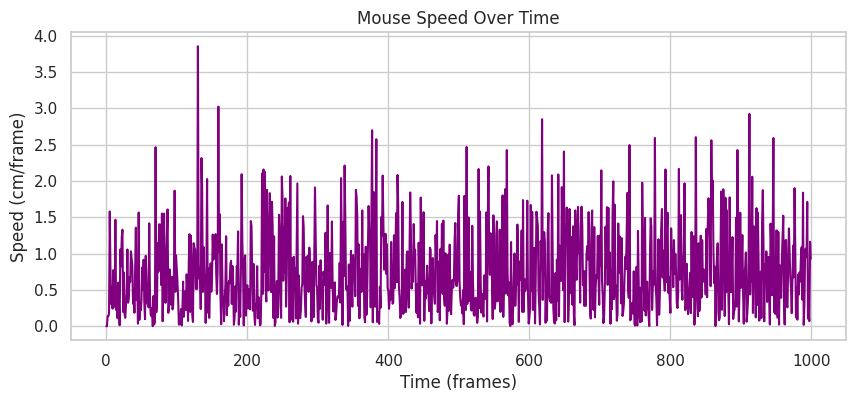

Positional tracking data saved as simulated_mouse_tracking.csv


In [1]:
# -----------------------------
# Automated Behavioral Tracking Simulation
# Author: Ghazal Raza
# -----------------------------

# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")

# Step 2: Simulate animal movement in a 2D arena
# Let's simulate 1 mouse moving in a 50x50 cm arena over 1000 time points
np.random.seed(42)
n_timepoints = 1000
arena_size = 50  # cm

# Initialize position arrays
x = np.zeros(n_timepoints)
y = np.zeros(n_timepoints)

# Random walk simulation: animal moves small steps each frame
for t in range(1, n_timepoints):
    step_size = np.random.normal(0, 1)  # average 1 cm per frame
    angle = np.random.uniform(0, 2*np.pi)
    x[t] = np.clip(x[t-1] + step_size*np.cos(angle), 0, arena_size)
    y[t] = np.clip(y[t-1] + step_size*np.sin(angle), 0, arena_size)

# Combine into dataframe
pos_data = pd.DataFrame({'Time': np.arange(n_timepoints),
                         'X': x,
                         'Y': y})

# Step 3: Plot trajectory
plt.figure(figsize=(6,6))
plt.plot(x, y, lw=1, color='blue')
plt.scatter(x[0], y[0], color='green', label='Start')
plt.scatter(x[-1], y[-1], color='red', label='End')
plt.xlim(0, arena_size)
plt.ylim(0, arena_size)
plt.xlabel("X position (cm)")
plt.ylabel("Y position (cm)")
plt.title("Simulated Mouse Trajectory")
plt.legend()
plt.show()

# Step 4: Compute behavioral metrics

# 4a. Total distance traveled
dx = np.diff(x)
dy = np.diff(y)
distance = np.sqrt(dx**2 + dy**2)
total_distance = np.sum(distance)
print(f"Total distance traveled: {total_distance:.2f} cm")

# 4b. Instantaneous speed
speed = distance  # cm per frame (assuming 1 frame = 1 second)
pos_data['Speed'] = np.concatenate(([0], speed))

# 4c. Time spent in specific zones
# Define arena zones (e.g., center = 20x20 cm square in middle)
center_min = arena_size/2 - 10
center_max = arena_size/2 + 10
in_center = ((x > center_min) & (x < center_max) & (y > center_min) & (y < center_max))
time_in_center = np.sum(in_center)
print(f"Time spent in center: {time_in_center} frames")

# Step 5: Visualize heatmap of positional occupancy
plt.figure(figsize=(6,6))
heatmap_bins = 20
plt.hist2d(x, y, bins=heatmap_bins, range=[[0, arena_size],[0, arena_size]], cmap='viridis')
plt.colorbar(label='Occupancy (frames)')
plt.xlabel("X position (cm)")
plt.ylabel("Y position (cm)")
plt.title("Positional Heatmap of Mouse Activity")
plt.show()

# Step 6: Velocity plot over time
plt.figure(figsize=(10,4))
plt.plot(pos_data['Time'], pos_data['Speed'], color='purple')
plt.xlabel("Time (frames)")
plt.ylabel("Speed (cm/frame)")
plt.title("Mouse Speed Over Time")
plt.show()

# Step 7: Save positional and metric data
pos_data.to_csv("simulated_mouse_tracking.csv", index=False)
print("Positional tracking data saved as simulated_mouse_tracking.csv")
